In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from keras.datasets import mnist
objects=mnist
(train_img,train_lab),(test_img,test_lab)=objects.load_data()

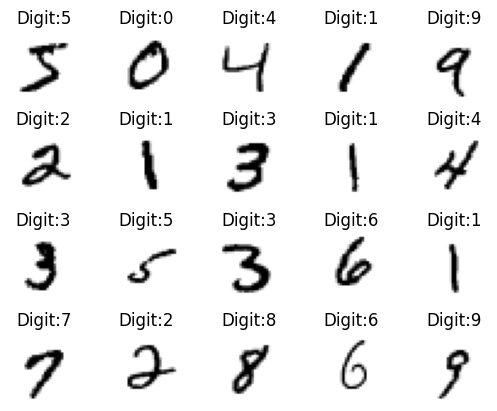

In [3]:
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(train_img[i],cmap='gray_r')
    plt.title("Digit:{}".format(train_lab[i]))
    plt.subplots_adjust(hspace=0.5)
    plt.axis('off')

In [4]:
print('Training images shape: ',train_img.shape)
print('Testing images shape: ',test_img.shape)

Training images shape:  (60000, 28, 28)
Testing images shape:  (10000, 28, 28)


Text(0.5, 0, 'Intensity')

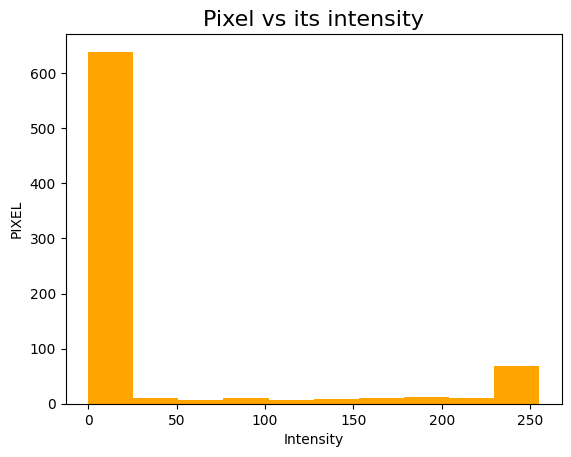

In [5]:
plt.hist(train_img[0].reshape(784),facecolor='orange')
plt.title('Pixel vs its intensity',fontsize=16)
plt.ylabel('PIXEL')
plt.xlabel('Intensity')

In [6]:
train_img=train_img/255.0
test_img=test_img/255.0

Text(0.5, 0, 'Intensity')

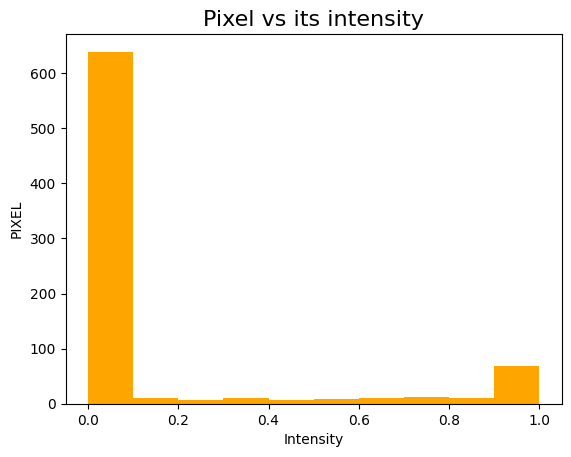

In [7]:
plt.hist(train_img[0].reshape(784),facecolor='orange')
plt.title('Pixel vs its intensity',fontsize=16)
plt.ylabel('PIXEL')
plt.xlabel('Intensity')

In [8]:
from keras.models import Sequential
from keras.layers import Flatten,Dense
model=Sequential()
input_layer=Flatten(input_shape=(28,28))
model.add(input_layer)
hidden_layer1=Dense(512,activation='relu')
model.add(hidden_layer1)
hidden_layer2=Dense(512,activation='relu')
model.add(hidden_layer2)
output_layer=Dense(10,activation='softmax')
model.add(output_layer)

In [9]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_img,train_lab,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 23s 10ms/step - loss: 0.1841 - accuracy: 0.9452
Epoch 2/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0806 - accuracy: 0.9749
Epoch 3/50
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0565 - accuracy: 0.9824
Epoch 4/50
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0431 - accuracy: 0.9863
Epoch 5/50
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0340 - accuracy: 0.9894
Epoch 6/50
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0288 - accuracy: 0.9909
Epoch 7/50
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0257 - accuracy: 0.9915
Epoch 8/50
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0212 - accuracy: 0.9930
Epoch 9/50
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0203 - accuracy: 0.9939
Epoch 10/50
1875/1875 [==============================] - 35s 18m

In [10]:
model.save('Shiva.h5')

In [11]:
loss_and_acc=model.evaluate(test_img,test_lab,verbose=2)
print('Test loss: ',loss_and_acc[0])
print('Test accuracy: ',loss_and_acc[1])

313/313 - 2s - loss: 0.2826 - accuracy: 0.9794 - 2s/epoch - 7ms/step
Test loss:  0.28260931372642517
Test accuracy:  0.9793999791145325


313/313 [==============================] - 2s 6ms/step
Predicted value:  7
Successful prediction.


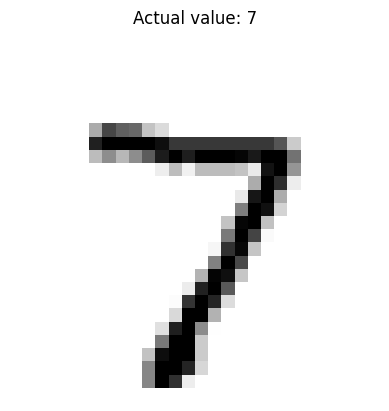

In [12]:
plt.imshow(test_img[0],cmap='gray_r')
plt.title('Actual value: {}'.format(test_lab[0]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted value: ',np.argmax(prediction[0]))
if(test_lab[0]==(np.argmax(prediction[0]))):
    print('Successful prediction.')
else:
    print('Unsuccessful prediction.')